In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
%matplotlib inline

In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.1.0


In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

### Data Processing
Required image processing dimensions for CNN: (number of images, height, width, channel)

In [6]:
train_images = np.expand_dims(train_images, -1)

In [7]:
train_images.shape

(60000, 28, 28, 1)

In [8]:
test_images = np.expand_dims(test_images, -1)

### Model building

- First layer, Conv2D, extract features: how many convolutional kernels, and kernel size
- Then Max pooling, reduce size, Pooling, keep on zooming out
- Then Conv2D, double number of kernels
- Then Global average pooling, add all height and width on each channel
- Dense with softmax

In [9]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3,3),
                               input_shape=train_images.shape[1:],
                               # input_shape=(28,28,1),
                               activation='relu',
                               padding='same'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 19,466
Trainable params: 19,466
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [12]:
history = model.fit(train_images, train_labels,
                    epochs=30,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.7879 - accuracy: 0.7374 - val_loss: 0.5580 - val_accuracy: 0.8075
Epoch 2/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4897 - accuracy: 0.8284 - val_loss: 0.4586 - val_accuracy: 0.8430
Epoch 3/30
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4321 - accuracy: 0.8471 - val_loss: 0.4648 - val_accuracy: 0.8420
Epoch 4/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3941 - accuracy: 0.8622 - val_loss: 0.3947 - val_accuracy: 0.8635
Epoch 5/30
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3686 - accuracy: 0.8698 - val_loss: 0.4041 - val_accuracy: 0.8610
Epoch 6/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3488 - accuracy: 0.8775 - val_loss: 0.3621 - val_accuracy: 0.8748
Epoch 7/30
60000/60000 [==============================] 

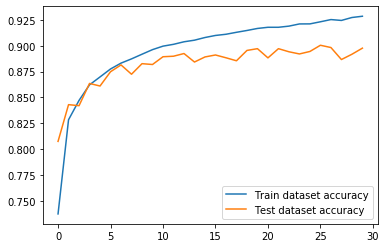

In [13]:
plt.plot(history.epoch, history.history.get('accuracy'), label='Train dataset accuracy')
plt.plot(history.epoch, history.history.get('val_accuracy'), label='Test dataset accuracy')
plt.legend()

As shown in plot:
- Train dataset accuracy is around 92%: model can be improved to improve accuracy
- Test dataset accuracy is around 89%, and oscillation after epoch 20: model overfit

One can improve accuracy by:
- Adding more hidden layers in Conv layers
- More conv layers

One can prevent overfit by:
- Adding dropout layer

In [14]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(64, (3,3), input_shape=train_images.shape[1:], activation='relu', padding='same'),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)        

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [17]:
history = model.fit(train_images, train_labels,
                    epochs=60,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 10s 172us/sample - loss: 0.9906 - accuracy: 0.6219 - val_loss: 0.5439 - val_accuracy: 0.8055
Epoch 2/60
60000/60000 [==============================] - 10s 171us/sample - loss: 0.5089 - accuracy: 0.8141 - val_loss: 0.4890 - val_accuracy: 0.8187
Epoch 3/60
60000/60000 [==============================] - 10s 171us/sample - loss: 0.4401 - accuracy: 0.8386 - val_loss: 0.4505 - val_accuracy: 0.8195
Epoch 4/60
60000/60000 [==============================] - 10s 164us/sample - loss: 0.4008 - accuracy: 0.8527 - val_loss: 0.3722 - val_accuracy: 0.8633
Epoch 5/60
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3769 - accuracy: 0.8604 - val_loss: 0.3443 - val_accuracy: 0.8721
Epoch 6/60
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3550 - accuracy: 0.8697 - val_loss: 0.3261 - val_accuracy: 0.8740
Epoch 7/60
60000/60000 [====================

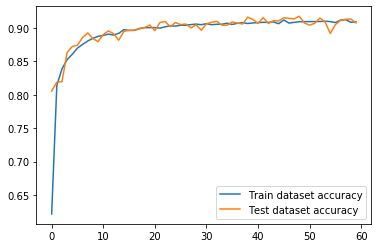

In [18]:
plt.plot(history.epoch, history.history.get('accuracy'), label='Train dataset accuracy')
plt.plot(history.epoch, history.history.get('val_accuracy'), label='Test dataset accuracy')
plt.legend()

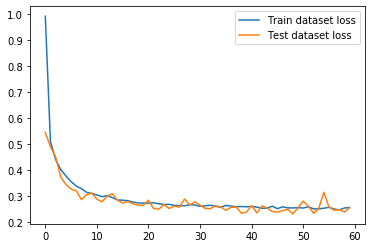

In [19]:
plt.plot(history.epoch, history.history.get('loss'), label='Train dataset loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='Test dataset loss')
plt.legend()

### End of this file